# **Lista 3** 
### Rafał Głodek
***

### **Zadanie 1**

In [1]:
import ctypes #tablice niskopoziomowe
class DynamicArray:
    """
    Tablica dynamiczna
    """
    def __init__(self):
        self._n = 0 #liczba elementów
        self._capacity = 1 #rozmiar tablicy
        self._A = self._make_array(self._capacity) #właściwa tablica

    def __len__(self): #wypisywanie listy elementów
        return self._n 

    def __getitem__(self,k): #wypisywanie elementu o danym indeksie
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]

    def append(self,obj): #dodawanie elementu do tablicy
        if self._n == self._capacity:
            self._resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1

    def _resize(self,c): #zmniejszanie/zwiększanie pojemności tablicy
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c

    def _make_array(self,c): #tworzenie tablicy
        return (c*ctypes.py_object)()
    
    def __str__(self): #wyświetlamy elementy tablicy, a miejsca puste oznaczamy jako " "
        result = []
        for j in range(self._capacity):
            if j >= self._n: #miejsca puste
                result.append(" ")
            else:
                result.append(self._A[j]) #miejsca zajęte
        return str(result)
    
    def insert(self, k, value): #dodanie elementu do tablicy na danym indeksie
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        if self._n == self._capacity: #jeśli jest potrzeba, powiększamy tablicę
            self._resize(2*self._capacity)
        for j in range(self._n-1, k-1, -1): #przesuwamy elementy "na prawo" od wybranego indeksu o jedno miejsce dalej
            self._A[j+1] = self._A[j]
        self._A[k] = value
        self._n += 1

    def remove(self, value): #usuwanie pierwszego elementu o danej wartości
        for k in range(self._n):
            if self._A[k] == value:
                for i in range(k+1, self._n): #elementy "na prawo" przesuywamy o jedno miejsce w lewo
                    self._A[i-1] = self._A[i]
                self._A[self._n-1] = None
                self._n -= 1
                break
    
    def expand(self, seq): #rozszerzanie tablicy o liste elementów
        for value in seq:
            self.append(value)

In [2]:

a = DynamicArray()
a.append(1)
a.append(3)
a.append(6)
print(a[1])
a.insert(1,5)
print(a[1])
a.remove(5)
a.append(8)
a.append(9)
a.expand([5,7,6,67])
print(a)

3
5
[1, 3, 6, 8, 9, 5, 7, 6, 67, ' ', ' ', ' ', ' ', ' ', ' ', ' ']


### **Zadanie 2**

Hipoteza:
Możemy przyspuszczać, że czas wykonania funkcji pop będzie malał liniowo wraz ze wzrostem indeksów, ponieważ bazowo funkcja pop() usuwa ostatni element, a przy n-elementowej liście pop(0)
musi przejść przez całą listę.

Potwierdźmy tę hipotezę eksperymentalnie, wykorzystując dużą listę jedynek.

In [3]:
import random
def gen(start, koniec, n):
    """
    Function 
    Funkcja generująca losowy ciąg n liczb

    Input
    start(integer) - początek zakresu
    koniec(integer) - koniec zakresu
    n(integer) - liczba wyrazów ciągu

    Output 
    wynik(list) - wygenerowany ciąg
    """
    wynik = []
    for i in range(n):
        wynik.append(random.randint(start,koniec))
    return wynik

In [4]:
import matplotlib.pyplot as plt
import time
def stoper(inds, x, arr_len):
    """
    Function
    Funkcja licząca czas wykonania funkcji pop dla różnych indeksów usuwanych elementów

    Input
    inds(list) - lista indeksów
    x(int) - ile pomiarów chcemy wykonać dla danego indeksu
    arr_len(int) - długość listy, z której będziemy usuwać indeksy

    Output
    time_values(list) - lista czasów
    inds(list) - lista indeksów
   
    """
    time_values = [] 
    arr = [1 for i in range(arr_len)]
    for ind in inds:
        full_time = 0
        for j in range(x):
            start = time.time()
            arr.pop(ind)
            end = time.time()
            full_time += end - start
            arr.append(1)
        time_values.append(full_time / x)
    return time_values, inds


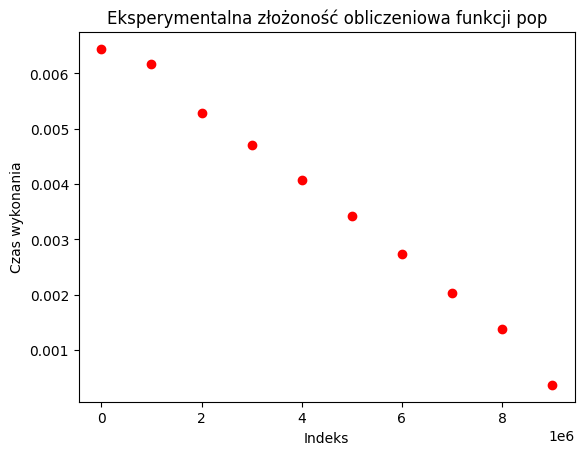

In [41]:
czasy, xs = stoper(range(0, 10**7, 10**6), 100, 10**7)
plt.plot(xs, czasy, "ro")
plt.xlabel("Indeks")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji pop")
plt.show()


Z wykresu widzimy, że hipoteza jest potwierdzona. Czas wykonania funkcji pop maleje liniowo wraz ze zwiększaniem indeksu.

### **Zadanie 3**

In [8]:
def array_sum(array):
    """
    Function 
    Funkcja wyliczająca sumę elementów listy list

    Input
    array(list) - lista list (tablica nxn)

    Output
    result(float/int) - suma elementów tablicy 
    """
    result = 0
    for arr in array:
        result += sum(arr)
    return result


In [11]:
print(array_sum([[2,3],[4,5,6,7], [1,1,1,1]]))

31


### **Zadanie 4**


In [12]:
def multi_append(array1, array2):
    """
    Function
    Funkcja dodająca do listy listę elementów za pomocą metody append

    Input
    array1(list) - lista, do której dodajemy elementy
    array2(list) - lista, o którą rozszerzamy listę pierwszą
    
    """
    for num in array2:
        array1.append(num)

In [13]:

def multi_gen(ile, roznica_dlugosci, n_0):
    """
    Function
    Funkcja generująca listę list o różnych długościach

    Input
    ile(int) - ile list ma być zagnieżdżonynch w głównej liście
    roznica_dlugosci(int) - różnica długości między kolejnymi listami
    n_0(int) - długość pierwszej listy

    Output
    result(list) - wygenerowana lista list

    """
    result = []
    n = n_0
    for i in range(ile):
        result.append(gen(1,1,n))
        n += roznica_dlugosci
    return result

In [14]:
def stoper2(arrays, x):
    """
    Function
    Funkcja mierząca czas wykonania rozszerzaia listy o listę dla metody extend i funkcji multi_append

    Input
    arrays(list) - lista list, o które będziemy rozszerzać podstawową (pustą) listę
    x(int) - liczba pomiarów, które wykonujemy dla każdej listy

    Output
    czasy_extend(list) - czasy zmierzone dla metody extend
    czasy_multi_append(list) - czasy zmierzone dla funkcji multi_append (wielokrotnego wywołania metody append)
    
    """
    czasy_extend = []
    czasy_multi_append = []
    default_array = []
    for array in arrays:
        full_time_extend = 0
        full_time_multi_append = 0
        for i in range(x):
            start_extend = time.time()
            default_array.extend(array)
            end_extend = time.time()
            default_array = []
            start_multi_append = time.time()
            multi_append(default_array, array)
            end_multi_array = time.time()
            default_array = []
            full_time_extend += end_extend - start_extend
            full_time_multi_append += end_multi_array - start_multi_append
        czasy_extend.append(full_time_extend/x)
        czasy_multi_append.append(full_time_multi_append/x)
    return czasy_extend, czasy_multi_append
        

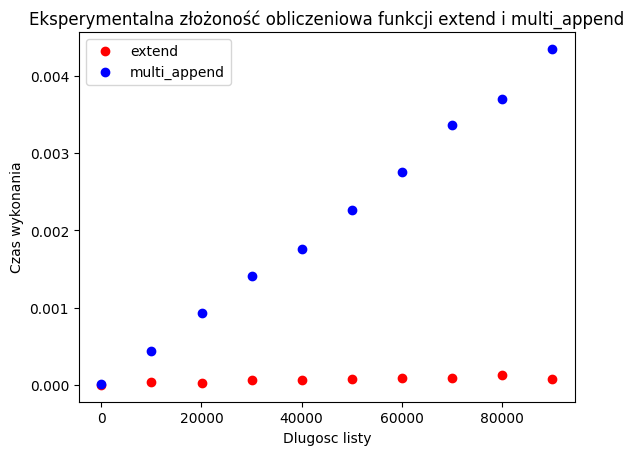

In [16]:
czasy_extend, czasy_multi_append = stoper2(multi_gen(10, 10000, 100), 100)
xs = range(10, 100000, 10000)
plt.plot(xs, czasy_extend, "ro", label="extend")
plt.plot(xs, czasy_multi_append, "bo", label="multi_append")
plt.xlabel("Dlugosc listy")
plt.legend(loc="best")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa funkcji extend i multi_append")
plt.show()


Widzimy, że różnice w czasie wykonania rozszerzania w przypadku metody extend są pomijalnie małe, a czas wykonania funkcji multi_append rośnie liniowo. Można zatem uznać, że metoda extend jest
dużo bardziej wydajna niż wielokrotne użycie metody append.

### **Zadanie 5**

In [115]:
class Empty(Exception):
    pass

class Queue:
    DEFAULT_CAPACITY = 10 #bazowa pojemność
    K = 0.25 #wspołczynnik progowy (stosunek liczby elementów w kolejce do całkowitej pamięci), przy którym będzie zwalniana pamięć

    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY #tworzymy pustą kolejkę
        self._size = 0 #liczba elementów
        self._front = 0 #indeks pierwszego elementu

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        if self._size <= Queue.K * len(self._data) and len(self._data) > self.DEFAULT_CAPACITY: #sprawdzamy, czy liczba elementów jest zbyt mała i dostatecznie duża do zredukowania
            if len(self._data) // 2 > self.DEFAULT_CAPACITY: #jeśli jest dostatecznie duża, to zwalniamy połowę pamięci
                self.resize(len(self._data) // 2)
            else:
                self.resize(self.DEFAULT_CAPACITY) #jeśli nie, to zwalniamy tyle pamięć do wartości podstawowej
        return value

    def enqueue(self,e):
        if self._size == len(self._data):
            self.resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1

    def resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size): #only existing elements
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0 

    def __str__(self):
        result = []
        for i in range(len(self._data)):
            if self._data[(self._front + i)%len(self._data)] is None:
                result.append(" ")
            else:
                result.append(self._data[(self._front + i)%len(self._data)])
        return str(result)
    

In [118]:
q = Queue()
for i in range(60):
    q.enqueue(1)
print(q)
for i in range(46):
    q.dequeue()
print(q)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


### **Zadanie 6**

In [73]:
class Deque():
    DEFAULT_CAPACITY = 10 #bazowa pojemność

    def __init__(self):
        self.data = [None] * Deque.DEFAULT_CAPACITY #tworzymy pustą kolejkę
        self.size = 0 #liczba elementów
        self.front = 0 #indeks pierwszego elementu
        self.end = self.size - 1 #indeks ostatniego elementu

    def __len__(self): #zwraca wielkość
        return self.size
    
    def is_empty(self): #zwraca, czy kolejka jest pusta
        return self.size == 0
    
    def first(self): #zwraca pierwszy element w kolejce
        if self.is_empty():
            raise Empty("Deque is empty")
        else:
            return self.data[self.front]
    
    def last(self): #zwraca ostatni element w kolejce
        if self.is_empty():
            raise Empty("Deque is empty")
        else:
            return self.data[self.end]
        
    def resize(self, cap): #rozszerza/zmniejsza pojemność
        old = self.data #kopiujemy starą kolejkę
        self.data = [None] * cap #tworzymy nową pustą
        walk = self.front #pierwszy element
        for i in range(self.size): #umieszczamy na poczzatku nowej kolejki stare wartości, zaczynając od elementu pierwszego
            self.data[i] = old[walk]
            walk = (walk + 1) % len(old)
        self.front = 0 #ustalamy, że początkowy indeks jest znów 0
        self.end = self.size - 1 #końcowy indeks, będzie miejscem ostatniego istniejącego elementu
        
    def add_first(self, item): #dodawanie elementu na początek kolejki
        if self.size == len(self.data): #jeśli jest potrzeba, zwiększamy pojemność
            self.resize(2*len(self.data))
        avail = (self.front - 1) % len(self.data) #indeks elementu dodawanego
        self.data[avail] = item #dodajemy element w ustalone miejsce
        self.front = avail #ustawiamy indeks początkowy w miejsce dodanego elementu
        self.size += 1 #zwiększamy rozmiar

    def add_last(self, item): #dodawanie elementu na koniec kolejki (analogicznie do wyżej)
        if self.size == len(self.data):
            self.resize(2*len(self.data))
        avail = (self.front + self.size) % len(self.data) 
        self.data[avail] = item
        self.end = avail
        self.size += 1

    def __str__(self): #wyswietlanie kolejki
        result = []
        for i in range(len(self.data)): #idziemy po istniejących elementach, zaczynając od pierwszego
            if self.data[(self.front + i)%len(self.data)] is None: #jesli element nie istnieje, to wyświetlamy " "
                result.append(" ")
            else:
                result.append(self.data[(self.front + i)%len(self.data)]) #jeśli istnieje, wyświetlamy go
        return str(result)
    
    def delete_first(self): #usuwanie pierwszego elementu
        if self.is_empty():
            raise Empty('Deque is empty')
        value = self.data[self.front] #wartość, którą będziemy usuwać
        self.data[self.front] = None
        self.front = (self.front + 1) % len(self.data) #nowy indeks początkowy
        self.size -= 1 #zmniejszamy rozmiar
        return value 
    
    def delete_last(self): #usuwanie ostatniego elementu
        if self.is_empty():
            raise Empty('Deque is empty')
        value = self.data[self.end] #usuwany element
        self.data[self.end] = None
        self.end = (self.end - 1) % len(self.data) #nowy indeks końcowy
        self.size -= 1 #zmniejszamy rozmiar
        return value 

In [74]:
d = Deque()
d.add_first(1)
d.add_first(5)
d.add_last(3)
d.add_first(5)
d.add_last(8)
d.add_first(5)
d.add_last(3)
d.add_first(5)
d.add_last(8)
d.add_first(5)
d.add_last(2)
print(d.first())
print(d.last())
print(d)

5
2
[5, 5, 5, 5, 5, 1, 3, 8, 3, 8, 2, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


### **Zadanie 7**

In [21]:
class Stack: #stos wzięty z wykładu
    def __init__(self):
        self._data = [] #nowy pusty stos

    def __len__(self):
        return len(self._data)

    def is_empty(self):
        return len(self._data)==0

    def push(self,e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop() 
    
    def __str__(self):
        return str(self._data)

In [29]:
def tag_checker(text):
    """
    Function
    Funkcja sprawdzająca poprawność tagów zamykających

    Input
    text(string) - kod html

    Output
    True(bool) - jeśli tagi zamykające zostały użyte poprawnie
    S.top()(string) - jeśli tagi nie zostały użyte poprawnie, zwraca nazwę tagu, który nie został zamknięty
    
    """
    voids = ["hr", "area", "base", "br", "col", "command", "embed", "img", "input", "keygen", "link", "meta", "param", "source", "track", "wbr", "img"]
    left_o = "<"
    right = ">"
    S = Stack()
    for i in range(len(text) - 1):
        if text[i] == left_o and text[i+1] != "/" and text[i+1] != "!":
            tag_name = ""
            j = i + 1
            while text[j] != right and text[j] != " ":
                tag_name += text[j].lower()
                j += 1
            else:
                if not tag_name in voids:
                    if tag_name[:11] != "view-source":
                        S.push(tag_name)

        elif text[i] == left_o and text[i+1] == "/" and text[i+1] != "!":
            tag_name = ""
            j = i + 2
            while text[j] != right and text[j] != " ":
                tag_name += text[j].lower()
                j += 1
            else:
                if tag_name == S.top():
                    S.pop()

    if S.is_empty():
        return True
    else:
        return S.top()
    

In [23]:
sample1 = open(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista3\HTML_sample1.txt").read()
sample2 = open(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista3\HTML_sample2.txt").read()
sample3 = open(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista3\HTML_sample3.txt").read()


In [30]:
print(tag_checker(sample1))
print(tag_checker(sample2))
print(tag_checker(sample3))

True
html
table


### **Zadanie 8**

In [35]:
import math
def permutation(array):
    """
    Function
    Funkcja zwracająca wszystkie permutacje n elementowej listy

    Input
    array(list) - lista, której permutacje chcemy otrzymać

    Output
    S1/S2(list) - permutacje danej listy
    """
    S1 = Stack()
    S2 = Stack()
        
    for i in range(len(array)):
        S1.push([array[i]])

    while True:

        while not S1.is_empty():
            cur_top = S1.top()
            for num in array:
                a = cur_top.copy()
                if not num in a:
                    a.append(num)
                    S2.push(a)
            S1.pop()

        if len(S1) == math.factorial(len(array)) and len(S1.top()) == len(array):
            return S1
        elif len(S2) == math.factorial(len(array)) and len(S2.top()) == len(array):
            return S2
        
        
        while not S2.is_empty():
            cur_top = S2.top()
            for num in array:
                a = cur_top.copy()
                if not num in a:
                    a.append(num)
                    S1.push(a)
            S2.pop()

        if len(S1) == math.factorial(len(array)) and len(S1.top()) == len(array):
            return S1
        elif len(S2) == math.factorial(len(array)) and len(S2.top()) == len(array):
            return S2
        

In [36]:
print(permutation([1,2,3,4]))

[[4, 1, 3, 2], [4, 1, 2, 3], [4, 2, 3, 1], [4, 2, 1, 3], [4, 3, 2, 1], [4, 3, 1, 2], [3, 1, 4, 2], [3, 1, 2, 4], [3, 2, 4, 1], [3, 2, 1, 4], [3, 4, 2, 1], [3, 4, 1, 2], [2, 1, 4, 3], [2, 1, 3, 4], [2, 3, 4, 1], [2, 3, 1, 4], [2, 4, 3, 1], [2, 4, 1, 3], [1, 2, 4, 3], [1, 2, 3, 4], [1, 3, 4, 2], [1, 3, 2, 4], [1, 4, 3, 2], [1, 4, 2, 3]]


### **Zadanie 9**

In [37]:
class Stack_using_queue(): #Stos zaimplementowany za pomocą kolejki

    def __init__(self):
        self.queue = Queue() #tworzymy kolejkę, na której będziemy pracować

    def __len__(self):
        return len(self.queue) #liczba elementów
    
    def is_empty(self):
        return self.queue.is_empty() #czy pusty
    
    def push(self, value): #dodawanie elementu do stosu
        self.queue.enqueue(value) #dodajemy wartość do kolejki
        for i in range(len(self.queue) - 1): #usuwamy i dodajemy wszystkie elementy kolejki, żeby przerzucić value do przodu (na górę)
            val = self.queue.dequeue()
            self.queue.enqueue(val)
        
    def top(self): #zwraca pierwszy (górny) element
        if self.is_empty():
            raise Empty("Stack is empty")
        else:
            return self.queue.first()
    
    def pop(self): #usuwanie elementu z góry jest analogiczne do usuwania elementu z przodu
        if self.is_empty():
            raise Empty('Stack is empty')
        else:
            return self.queue.dequeue()
    
    def __str__(self): #wizualizacja stosu (lewa strona = góra)
        return str(self.queue)

Push dla kolejki n-elementowej wymaga zdekolejkowania n-1 i zakolejkowania n elementów, więc złożoność tej metody będzie wynosiła O(n).

Pop oraz top działają standardowo, jak dla kolejki, zatem ich zlożoność to O(1) 

In [38]:
s = Stack_using_queue()
s.push(4)
s.push(9)
s.pop()
print(s)

[4, ' ']


### **Zadanie 10**

In [84]:
class Queue_using_two_stacks(): #kolejka zaimplementowana za pomocą dwóch stosów

    def __init__(self): #tworzymy stosy, na których będziemy pracować (s1 reprezentuje kolejkę, s2 jest pomocniczy)
        self.s1 = Stack()
        self.s2 = Stack()

    def is_empty(self): #czy jest pusta
        return self.s1.is_empty() 

    def enqueue(self, value): #zakolejkowanie elementu
        for i in range(len(self.s1)): #najpierw przerzucamy wszystkie elementy z s1 na s2
            self.s2.push(self.s1.pop())
        self.s1.push(value) #dodajemy na dół s1 wartość
        for i in range(len(self.s2)): #przerzucamy wszystkie elementy z powrotem do s1
            self.s1.push(self.s2.pop())
    
    def dequeue(self): #jako, że przód kolejki jest na górze stosu, to "dekolejkowanie" jest usuwaniem górnego elementu
        if self.is_empty():
            raise Empty('Stack is empty')
        else:
            self.s1.pop()
    
    def __len__(self): #liczba elementów
        return(len(self.s1))

    def first(self): #pierwszy element
        if self.is_empty():
            raise Empty('Stack is empty')
        else:
            return self.s1.top()
        
    def __str__(self): #wyświetlanie kolejki
        return str(self.s1)

In [91]:
a = Queue_using_two_stacks()
a.enqueue(3)
a.enqueue(1)
a.enqueue(5)
print(a.first())
a.dequeue()
print(a)


3
[1, 5]
